<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/68_cartogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vaasudevan Srinivasan 🧑🏻‍💻  
StratagemGIS Solutions

In [ ]:
%%capture
!pip install geoplot pyogrio

In [ ]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import pooch

In [ ]:
nb_counties = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/vector/geonb_county-comte_shp.zip',
    known_hash='2abbb813b5b78f721ea5cc75f4f29a1f27da984476c74fe9f3b3026f41427d6a'
)

anb_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/vector/geonb_anb_shp.zip',
    known_hash='67de38f5edb30f2578aef2a64f10a0a7cc7a8a1b77d680e34936574e35528f26'
)

In [ ]:
anb = gpd.read_file(f'{anb_file}!geonb_anb_addresses.shp', engine='pyogrio')
counties = (
    gpd.read_file(nb_counties, include_fields=['ENG_NAME'])
    .assign(area=lambda df_: df_.area)
    .sort_values(['area', 'ENG_NAME'], ascending=[False, True])
    .drop_duplicates(subset=['ENG_NAME'])
)

In [ ]:
result = counties.merge(
    gpd.sjoin(counties, anb[['geometry']], predicate='contains')
    .groupby('ENG_NAME', as_index=False)
    [['index_right']].count()
    .rename(columns={'index_right': 'count'}),
    on='ENG_NAME'
).to_crs('EPSG:4326')

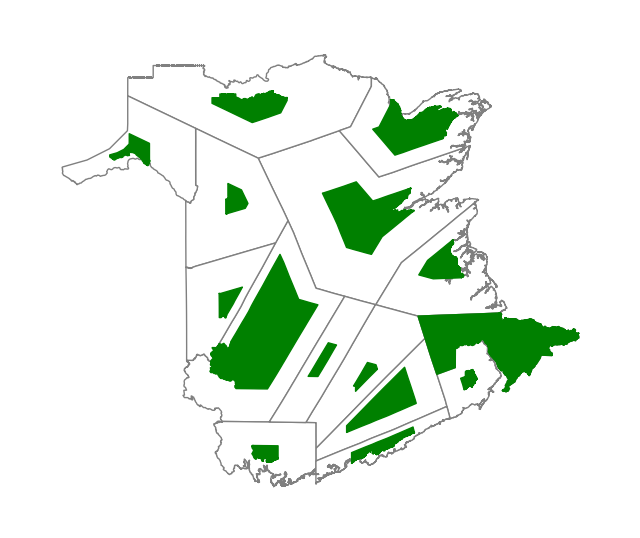

In [ ]:
ax = gplt.cartogram(
    result, scale='count',
    projection=gcrs.WebMercator(),
    figsize=(8, 8), color='green',
    extent=result.total_bounds,
)

gplt.polyplot(result, facecolor='white', edgecolor='grey', ax=ax);

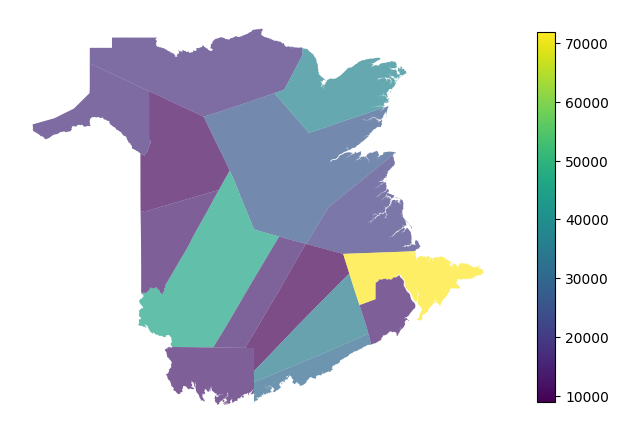

In [ ]:
result.plot(
    column='count',
    figsize=(8, 8),
    alpha=0.7,
    legend=True,
    legend_kwds={'shrink': 0.6},
)

plt.axis('off');